In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
movies = pd.read_csv('data-files/tmdb-5000/tmdb_5000_movies.csv')
print(movies.columns)
movies.head(2)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
# 필요한 컬럼만 뽑아서 새 데이터프레임 만들기
movies2 = movies[['id', 'title', 'genres', 'keywords', 'overview', 
                  'vote_average', 'vote_count', 'popularity']].copy()

In [9]:
# 데이터 전처리 : 결측값 확인 -> 빈문자열로 대체
movies2.info()
movies2.fillna('', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   keywords      4803 non-null   object 
 4   overview      4803 non-null   object 
 5   vote_average  4803 non-null   float64
 6   vote_count    4803 non-null   int64  
 7   popularity    4803 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [26]:
# 데이터 전처리 : genre dict -> genre string
print( type( movies2['genres'][0] ) )
print( eval(movies2['genres'][0]) )
for genre in eval(movies2['genres'][0]):
    print(genre['name'])

print( [ genre['name'] for genre in eval(movies2['genres'][0]) ] )
' '.join([ genre['name'] for genre in eval(movies2['genres'][0]) ])

#######

def extract_name(genres_string):
    genres = [ genre['name'].replace(' ', '') for genre in eval(genres_string) ]
    return ' '.join(genres)

movies2['genres2'] = movies2['genres'].map(extract_name)

<class 'str'>
[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]
Action
Adventure
Fantasy
Science Fiction
['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [27]:
movies2['genres2'][:10]

0    Action Adventure Fantasy ScienceFiction
1                   Adventure Fantasy Action
2                     Action Adventure Crime
3                Action Crime Drama Thriller
4            Action Adventure ScienceFiction
5                   Fantasy Action Adventure
6                           Animation Family
7            Action Adventure ScienceFiction
8                   Adventure Fantasy Family
9                   Action Adventure Fantasy
Name: genres2, dtype: object

In [28]:
# 데이터 전처리 : keywords dict -> keywords string

print( type(movies2['keywords'][0]) )
print( movies2['keywords'][0] )

movies2['keywords2'] = movies2['keywords'].map(extract_name)

<class 'str'>
[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]


In [29]:
movies2['keywords2'][:10]

0    cultureclash future spacewar spacecolony socie...
1    ocean drugabuse exoticisland eastindiatradingc...
2    spy basedonnovel secretagent sequel mi6 britis...
3    dccomics crimefighter terrorist secretidentity...
4    basedonnovel mars medallion spacetravel prince...
5    dualidentity amnesia sandstorm loveofone'slife...
6    hostage magic horse fairytale musical princess...
7    marvelcomic sequel superhero basedoncomicbook ...
8    witch magic broom schoolofwitchcraft wizardry ...
9    dccomics vigilante superhero basedoncomicbook ...
Name: keywords2, dtype: object

In [30]:
# string -> int 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
titles_count = cv.fit_transform(movies2['title'])
genres_count = cv.fit_transform(movies2['genres2'])
keywords_count = cv.fit_transform(movies2['keywords2'])
overview_count = cv.fit_transform(movies2['overview'])

In [35]:
titles_count.shape, genres_count.shape, keywords_count.shape, overview_count.shape

((4803, 4683), (4803, 20), (4803, 9789), (4803, 21262))

In [40]:
# 수치화된 문자열 컬럼 병합
from scipy.sparse import hstack as sp_hstack

movies3 = sp_hstack((genres_count, keywords_count))
movies3

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 48943 stored elements and shape (4803, 9809)>

In [ ]:
# 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

movie_sim = cosine_similarity(movies3, movies3)

In [44]:
print( movie_sim.shape )

movies_sim_df = \
    pd.DataFrame(movie_sim, columns=movies2['title'], index=movies2['title'])

(4803, 4803)


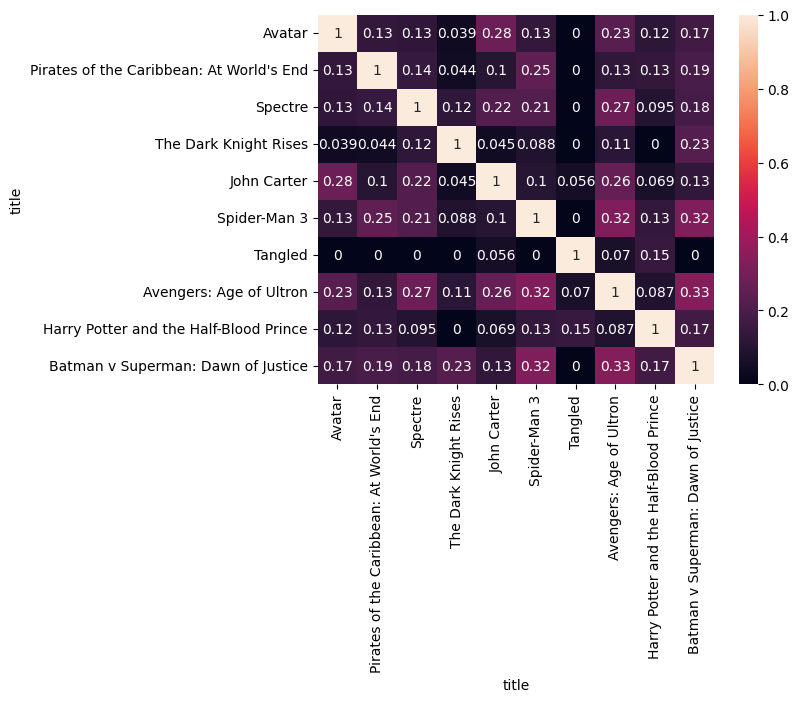

In [47]:
sns.heatmap(movies_sim_df.iloc[:10, :10], annot=True)
plt.show()

In [51]:
movies_sim_df.iloc[7, :].sort_values(ascending=False)[1:10 + 1]

title
Ant-Man                                0.821584
Captain America: Civil War             0.771517
The Avengers                           0.720577
Captain America: The Winter Soldier    0.670820
Thor: The Dark World                   0.640513
Iron Man 2                             0.639010
X-Men                                  0.612372
X2                                     0.577350
The Wolverine                          0.560449
Captain America: The First Avenger     0.560112
Name: Avengers: Age of Ultron, dtype: float64